In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing th

In [2]:
# Load the CSV data into a pandas data frame
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0273EN-SkillsNetwork/labs/v1/m2/data/ILPD.csv")


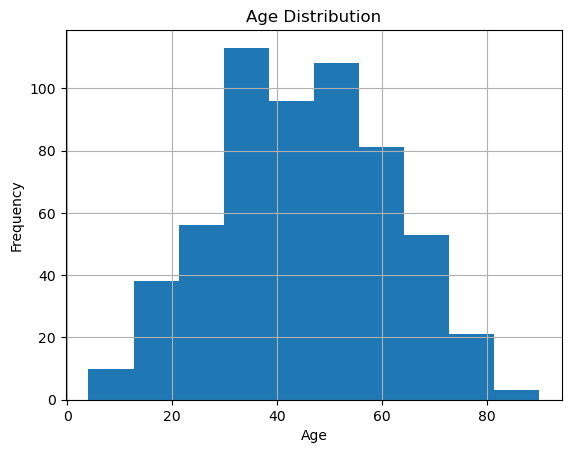

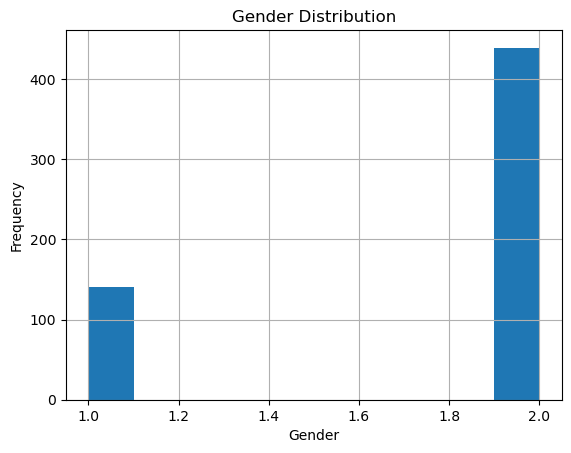

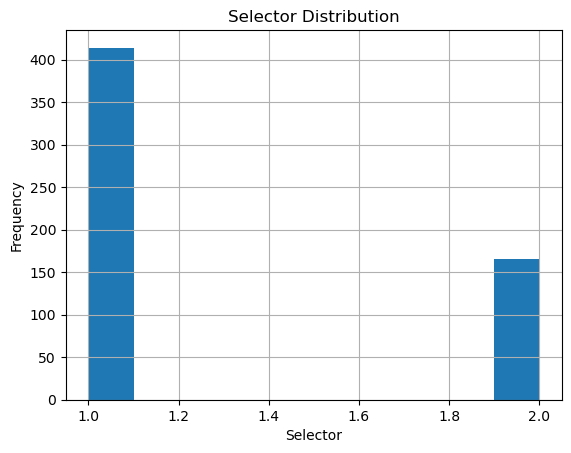

In [3]:
# Save histograms of data distribution for 'Age', 'Gender', and 'Selector'
plt.figure()
data['Age'].hist()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age_histogram.png')

plt.figure()
data['Gender'].hist()
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.savefig('gender_histogram.png')

plt.figure()
data['Selector'].hist()
plt.title('Selector Distribution')
plt.xlabel('Selector')
plt.ylabel('Frequency')
plt.savefig('selector_histogram.png')

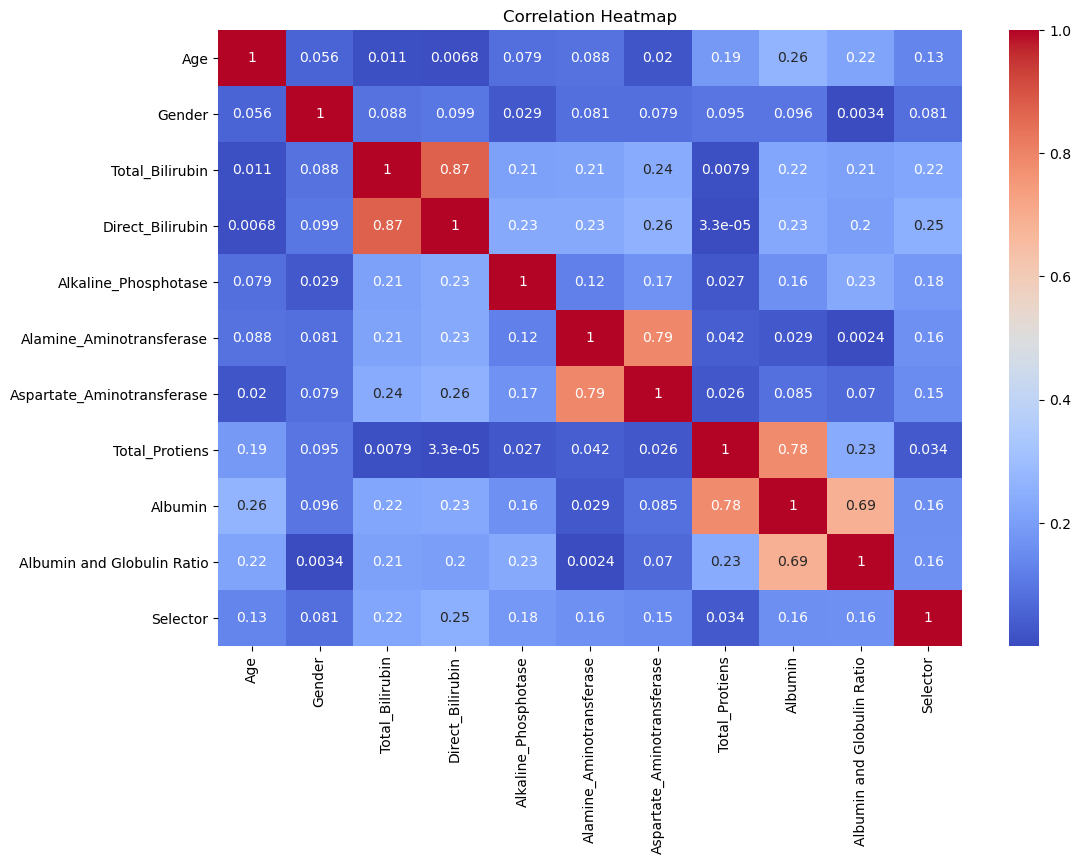

In [4]:
# Save correlation heatmap of the data set
plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(abs(corr), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png', bbox_inches='tight')

In [5]:
# Identify top 5 features with highest absolute correlation with 'Selector'
correlation_with_selector = corr['Selector'].abs().sort_values(ascending=False)
top_5_features = correlation_with_selector[1:6]  # Exclude 'Selector' itself
print("Top 5 Features:")
print(top_5_features)


Top 5 Features:
Direct_Bilirubin              0.246273
Total_Bilirubin               0.220218
Alkaline_Phosphotase          0.183363
Albumin and Globulin Ratio    0.163131
Alamine_Aminotransferase      0.163117
Name: Selector, dtype: float64


In [6]:
# Standard scaling on the top 5 attributes
scaler = StandardScaler()
top_5_attributes = data[top_5_features.index]
scaled_data = scaler.fit_transform(top_5_attributes)
scaled_data = pd.DataFrame(scaled_data, columns=top_5_attributes.columns)


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [7]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, data['Selector'], test_size=0.2, random_state=42)

In [8]:
# Train and test classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Trees': DecisionTreeClassifier(),
    'Random Forests': RandomForestClassifier(),
    'Multi layer perceptron': MLPClassifier(max_iter=500)
}

results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:907: DeprecationWarning: `np.int` is a deprecated alias 

In [9]:
# Create DataFrame for the results
results_df = pd.DataFrame(list(results.items()), columns=['Classifier', 'Accuracy'])
print("\nClassifier Accuracy Comparison:")
print(results_df)


Classifier Accuracy Comparison:
               Classifier  Accuracy
0     Logistic Regression  0.620690
1                     KNN  0.646552
2             Naive Bayes  0.577586
3          Decision Trees  0.586207
4          Random Forests  0.646552
5  Multi layer perceptron  0.620690
